In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/Users/miguel/HaaS/Module 11_Cap/practical_application_II_starter/data/vehicles.csv')

In [4]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [5]:
df.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [7]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


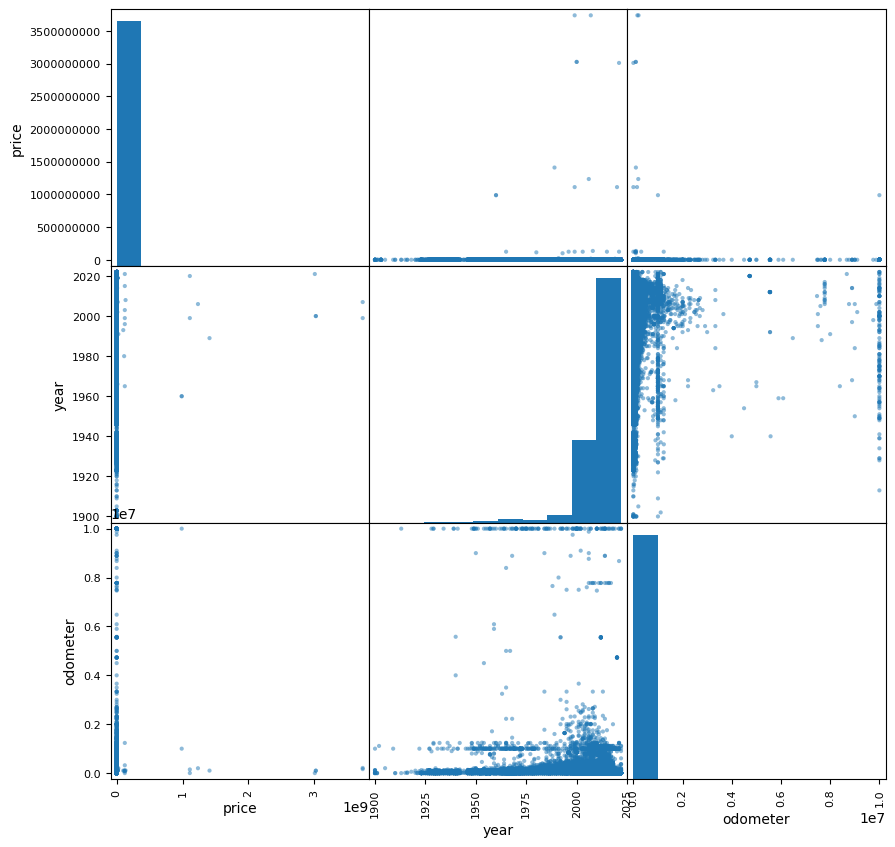

In [8]:
from pandas.plotting import scatter_matrix

# Checking the for any normality
numeric_cols = ['price', 'year', 'odometer']
scatter_matrix(df[numeric_cols], figsize=(10, 10))
plt.show()


In [9]:
# Drop the specified columns
df = df.drop(['id', 'model','region', 'VIN', 'state', 'title_status'], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   transmission  424324 non-null  object 
 8   drive         296313 non-null  object 
 9   size          120519 non-null  object 
 10  type          334022 non-null  object 
 11  paint_color   296677 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 39.1+ MB


In [11]:
# Proportion of null value columns
column_proportions = df.count() / len(df) * 100

print("Proportion of non-null values in each column:")
print(column_proportions)


Proportion of non-null values in each column:
price           100.000000
year             99.717719
manufacturer     95.866286
condition        59.214768
cylinders        58.377530
fuel             99.294181
odometer         98.969265
transmission     99.401237
drive            69.413653
size             28.232524
type             78.247283
paint_color      69.498922
dtype: float64


In [12]:
df = df.drop(columns=['size'])

In [13]:
# Unique Value Count per Categorical Column
object_columns = df.select_dtypes(include=['object']).columns

for column in object_columns:
    unique_value_counts = df[column].value_counts()
    print(f"Unique value counts in {column} column:")
    print(unique_value_counts)
    print()



Unique value counts in manufacturer column:
manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari           

In [14]:
# Defined groups for manufacturers
manufacturer_groups = {
    'american': ['ford', 'chevrolet', 'dodge', 'ram', 'gmc', 'jeep', 'chrysler', 'buick', 'cadillac', 'lincoln', 'mercury', 'pontiac', 'saturn', 'harley-davidson'],
    'german': ['bmw', 'mercedes-benz', 'audi', 'volkswagen', 'mini', 'porsche'],
    'japanese': ['toyota', 'honda', 'nissan', 'subaru', 'mazda', 'lexus', 'infiniti', 'mitsubishi', 'acura', 'scion', 'suzuki', 'datsun'],
    'korean': ['hyundai', 'kia', 'genesis', 'daewoo', 'ssangyong'],
    'italian': ['fiat', 'alfa-romeo', 'lancia', 'maserati', 'ferrari', 'lamborghini'],
    'british': ['land rover', 'jaguar', 'aston-martin', 'lotus', 'bentley', 'rolls-royce', 'morgan'],
    'french': ['renault', 'citroen', 'peugeot'],
    'swedish': ['volvo', 'saab', 'koenigsegg'],
    'other': ['tesla', 'smart', 'hummer', 'maybach', 'scion', 'isuzu', 'mini', 'plymouth']
}

# Defined a mapping of continents to their respective manufacturers
continent_manufacturers = {
    'north_america': ['american'],
    'europe': ['german', 'italian', 'british', 'french', 'swedish'],
    'asia': ['japanese', 'korean'],
    'other': ['other']
}

# Defined a mapping of categories to their respective groups
type_groups = {
    'Car': ['sedan', 'coupe', 'convertible'],
    'SUV': ['SUV'],
    'Truck': ['pickup', 'truck', 'offroad'],
    'other': ['van', 'mini-van', 'bus', 'hatchback', 'wagon']
}

# Drop size column and filter out N/A odometer values
df1 = df.dropna(subset=['odometer'])

# Filter out rows with year less than 2000 and > 10,000 miles
#df1 = df1[(df1['odometer'] >= 500) & (df1['odometer'] <= 200000)]
df1 = df1[df1['year'] >= 2000]
df1 = df1[~df1['condition'].isin(['new', 'salvage'])]
df1 = df1[df1['price'] >= 5000]
df1 = df1[df1['odometer'] >= 10000]

# Defined the list of categorical columns that need N/A values filled with 'other'
columns_to_replace_nan = ['condition', 'cylinders', 'fuel', 'transmission', 'drive', 'paint_color', 'type']
# Replace NaN values with mode for categorical columns
for column in columns_to_replace_nan:
    mode_value = df1[column].mode()[0]
    df1[column].fillna(mode_value, inplace=True)

# Defined the values to be replaced with 'other' in each categorical column
values_to_replace = {
    'condition': ['like new', 'fair'],
    'fuel': ['diesel', 'hybrid', 'electric'],
    'paint_color': ['brown', 'custom', 'green', 'yellow', 'orange', 'purple'],
    'cylinders': ['3 cylinders', '5 cylinders', '10 cylinders', '12 cylinders']
}

# Replace the specified values with 'other' in each column
for column, replace_values in values_to_replace.items():
    df1[column] = df1[column].replace(replace_values, 'other')

# function to map manufacturers to their respective groups
def group_manufacturer(manufacturer):
    if pd.isna(manufacturer): 
        return 'other'
    for group, manufacturers in manufacturer_groups.items():
        if manufacturer.lower() in manufacturers:
            return group
    return 'other'

# Defined a function to map manufacturers to their respective continents
def group_manufacturer_continent(manufacturer_group):
    for continent, manufacturers in continent_manufacturers.items():
        if manufacturer_group.lower() in manufacturers:
            return continent
    return 'other'

# Defined a function to map types to their respective groups
def group_type(vehicle_type):
    for group, types in type_groups.items():
        if vehicle_type.lower() in types:
            return group
    return 'other'

# Apply the function to create a new 'manufacturer_group' column
df1['manufacturer_group'] = df1['manufacturer'].apply(group_manufacturer)

# Apply the function to create a new 'manufacturer_continent' column
df1['manufacturer_continent'] = df1['manufacturer_group'].apply(group_manufacturer_continent)

# Apply the function to create a new 'vehicle_type_group' column
df1['vehicle_type_group'] = df1['type'].apply(group_type)

# Drop the original 'manufacturer' column
df1 = df1.drop(columns=['manufacturer', 'manufacturer_group', 'type'])
# df1 = df1[df1['transmission'].isin(['automatic'])]
# df1 = df1[df1['fuel'].isin(['gas'])]


# Display the modified DataFrame
df1.head()


,price,year,condition,cylinders,fuel,odometer,transmission,drive,paint_color,manufacturer_continent,vehicle_type_group
27,33590,2014.0,good,8 cylinders,gas,57923.0,other,4wd,white,north_america,Truck
28,22590,2010.0,good,8 cylinders,gas,71229.0,other,4wd,blue,north_america,Truck
29,39590,2020.0,good,8 cylinders,gas,19160.0,other,4wd,red,north_america,Truck
30,30990,2017.0,good,8 cylinders,gas,41124.0,other,4wd,red,asia,Truck
31,15000,2013.0,excellent,6 cylinders,gas,128000.0,automatic,rwd,black,north_america,Truck


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291377 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   price                   291377 non-null  int64  
 1   year                    291377 non-null  float64
 2   condition               291377 non-null  object 
 3   cylinders               291377 non-null  object 
 4   fuel                    291377 non-null  object 
 5   odometer                291377 non-null  float64
 6   transmission            291377 non-null  object 
 7   drive                   291377 non-null  object 
 8   paint_color             291377 non-null  object 
 9   manufacturer_continent  291377 non-null  object 
 10  vehicle_type_group      291377 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 26.7+ MB


In [16]:
df1.describe()

,price,year,odometer
count,2.913770e+05,291377.000000,2.913770e+05
mean,6.072325e+04,2013.358168,9.153089e+04
std,1.077653e+07,4.438508,1.002470e+05
min,5.000000e+03,2000.000000,1.000000e+04
25%,1.040000e+04,2011.000000,4.114700e+04
50%,1.799000e+04,2014.000000,8.313900e+04
75%,2.899000e+04,2017.000000,1.260000e+05
max,3.736929e+09,2022.000000,1.000000e+07


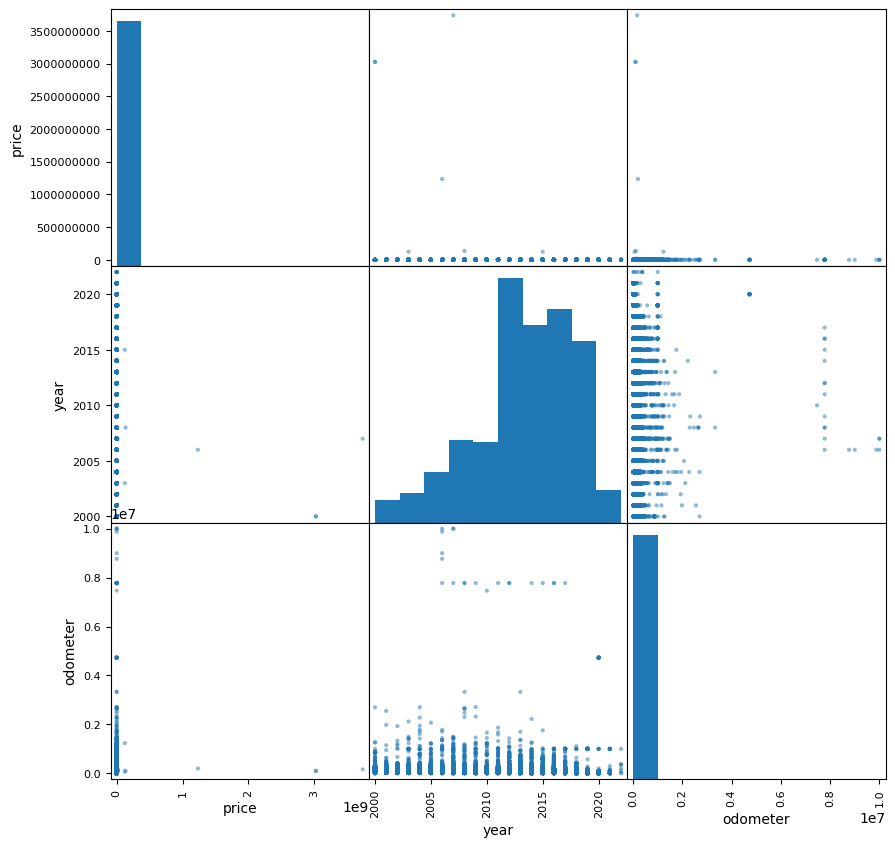

In [17]:
# Checking for normality
numeric_cols = ['price', 'year', 'odometer']
scatter_matrix(df1[numeric_cols], figsize=(10, 10))
plt.show()


In [18]:
# Unique Value Count per Categorical Column
object_columns = df1.select_dtypes(include=['object']).columns

for column in object_columns:
    unique_value_counts = df1[column].value_counts()
    print(f"Unique value counts in {column} column:")
    print(unique_value_counts)
    print()

Unique value counts in condition column:
condition
good         202222
excellent     73343
other         15812
Name: count, dtype: int64

Unique value counts in cylinders column:
cylinders
6 cylinders    187236
4 cylinders     52018
8 cylinders     49061
other            3062
Name: count, dtype: int64

Unique value counts in fuel column:
fuel
gas      240652
other     50725
Name: count, dtype: int64

Unique value counts in transmission column:
transmission
automatic    230588
other         49045
manual        11744
Name: count, dtype: int64

Unique value counts in drive column:
drive
4wd    183690
fwd     70487
rwd     37200
Name: count, dtype: int64

Unique value counts in paint_color column:
paint_color
white     137766
black      46987
silver     31359
blue       21342
red        20617
grey       17661
other      15645
Name: count, dtype: int64

Unique value counts in manufacturer_continent column:
manufacturer_continent
north_america    149483
asia              91356
europe        

In [19]:
# Filter condition column
#df2_condition = df1['condition'].apply(lambda x: 'other' if x != 'good' else x)

# Filter cylinders column
#df2_cylinders = df1['cylinders'].apply(lambda x: 'other' if x != '6 cylinders' else x)

# Filter drive column
#df2_drive = df1['drive'].apply(lambda x: 'other' if x != '4wd' else x)

# Filter paint_color column
#df2_paint_color = df1['paint_color'].apply(lambda x: 'other' if x != ['white', 'black', 'silver'] else x)

# Transmissioncolumn
#df2_transmission = df1['transmission'].apply(lambda x: 'other' if x != 'automatic' else x)

# Filter vehicle_type_group column
#df2_vehicle_type_group = df1['vehicle_type_group'].apply(lambda x: 'other' if x != 'Car' else x)

# Filter manufacturer_continent column
#df2_manufacturer_continent = df1['manufacturer_continent'].apply(lambda x: 'other' if x != 'north_america' else x)


# Defined a list of allowed colors
allowed_colors = ['white', 'black', 'silver']

# Replace colors not in the allowed list with 'other'
df1['paint_color'] = df1['paint_color'].where(df1['paint_color'].isin(allowed_colors), 'other') 
# Create df2
#df2 = df1.copy()
#df2['condition'] = df2_condition
#df2['cylinders'] = df2_cylinders
#df2['drive'] = df2_drive
#df2['paint_color'] = df2_paint_color
#df2['vehicle_type_group'] = df2_vehicle_type_group
#df2['manufacturer_continent'] = df2_manufacturer_continent
#df2['transmission'] = df2_transmission

# Display the head of df2
#df2.head()



In [20]:
df1 = df1[(df1['price'] <= 35000) & (df1['odometer'] < 150000) & (df1['year'] <= 2018)]

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195972 entries, 27 to 426878
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   price                   195972 non-null  int64  
 1   year                    195972 non-null  float64
 2   condition               195972 non-null  object 
 3   cylinders               195972 non-null  object 
 4   fuel                    195972 non-null  object 
 5   odometer                195972 non-null  float64
 6   transmission            195972 non-null  object 
 7   drive                   195972 non-null  object 
 8   paint_color             195972 non-null  object 
 9   manufacturer_continent  195972 non-null  object 
 10  vehicle_type_group      195972 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 17.9+ MB


In [22]:
df1.describe()

,price,year,odometer
count,195972.000000,195972.000000,195972.000000
mean,17590.227420,2013.154701,81354.488662
std,8343.350495,3.892781,37921.053909
min,5000.000000,2000.000000,10000.000000
25%,10000.000000,2011.000000,48595.500000
50%,16198.000000,2014.000000,82859.500000
75%,24000.000000,2016.000000,112500.250000
max,35000.000000,2018.000000,149998.000000


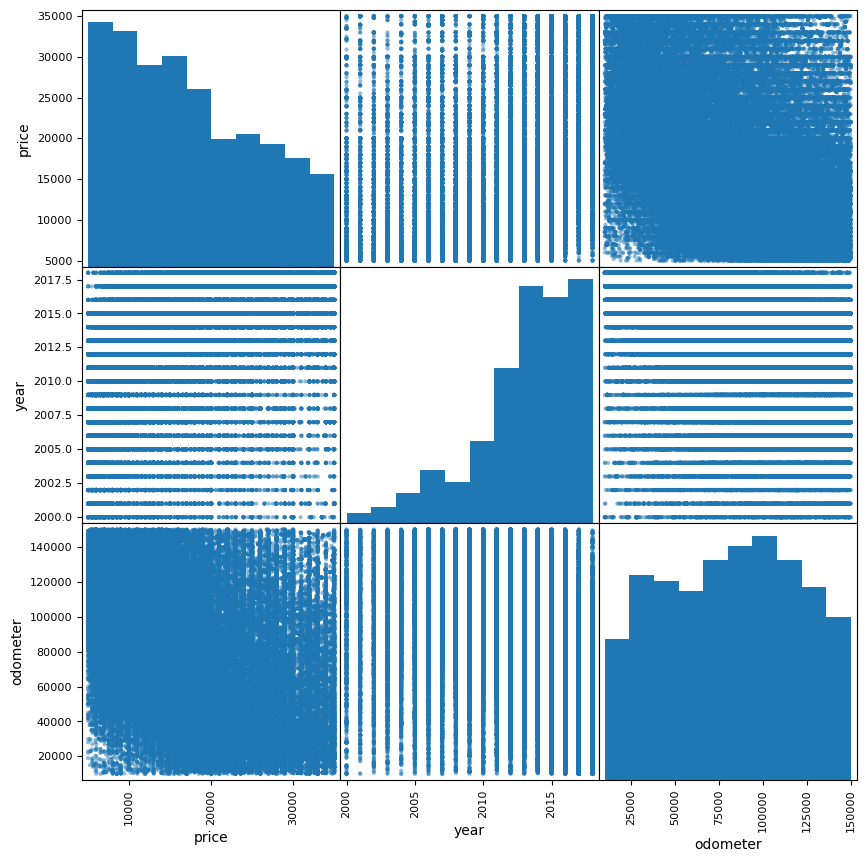

In [23]:
#Finally found some normality
numeric_cols = ['price', 'year', 'odometer']
scatter_matrix(df1[numeric_cols], figsize=(10, 10))
plt.show()


In [24]:
# Unique Value Count per Categorical Column
object_columns = df1.select_dtypes(include=['object']).columns

for column in object_columns:
    unique_value_counts = df1[column].value_counts()
    print(f"Unique value counts in {column} column:")
    print(unique_value_counts)
    print()

Unique value counts in condition column:
condition
good         131411
excellent     53840
other         10721
Name: count, dtype: int64

Unique value counts in cylinders column:
cylinders
6 cylinders    126181
4 cylinders     43614
8 cylinders     24158
other            2019
Name: count, dtype: int64

Unique value counts in fuel column:
fuel
gas      171569
other     24403
Name: count, dtype: int64

Unique value counts in transmission column:
transmission
automatic    154676
other         32808
manual         8488
Name: count, dtype: int64

Unique value counts in drive column:
drive
4wd    112772
fwd     58038
rwd     25162
Name: count, dtype: int64

Unique value counts in paint_color column:
paint_color
white     87907
other     53746
black     31615
silver    22704
Name: count, dtype: int64

Unique value counts in manufacturer_continent column:
manufacturer_continent
north_america    91031
asia             67117
europe           31762
other             6062
Name: count, dtype: int64

In [25]:
# Split the data into features (X) and target variable (y)
X = df1.drop(columns=['price'])
y = df1['price']

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Defined numerical and categorical features for preprocessing
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [28]:
# Created a Preprocessing Pipeline, with onehotencoder for the categorical values and scaler for numerical
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
# Base Pipeline will flow preprocessor features and run through 
pipeline_base = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures()),
    ('target_regressor', TransformedTargetRegressor(regressor=Ridge()))
])

param_grid_base = {
    'poly__degree': [1, 2, 3],
    'target_regressor__regressor__alpha': [0.1, 1, 10, 100]
}
# Fit the base model
grid_search_base = GridSearchCV(pipeline_base, param_grid_base, cv=5)
grid_search_base.fit(X_train, np.log1p(y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['year', 'odometer'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         Index(['condition', 'cylinders', 'fuel', 'transmission', 'drive',
       'paint_color', 'manufacturer_continent', 'vehicle_type_group'],
      dtype='object'))])),
                                       ('poly', PolynomialFeatures()),
                                       ('target_regressor',
                                        TransformedTargetRegressor(regressor=Ridge()))]),
             param_grid={'poly__degree': [1, 2, 3],
                         'target_regressor__regressor__alpha': [0.1, 1, 10,
                                                                100]})

In [29]:
# Evaluate the base model
test_score_base = grid_search_base.score(X_test, np.log1p(y_test))
print("Base Pipeline Results:")
print(f"Best Hyperparameters: {grid_search_base.best_params_}")
print(f"R-squared on test set: {test_score_base:.4f}")


Base Pipeline Results:
Best Hyperparameters: {'poly__degree': 3, 'target_regressor__regressor__alpha': 100}
R-squared on test set: 0.6894


In [30]:
# Permutation Importance for Base Pipeline
perm_importance_base = permutation_importance(grid_search_base, X_test, np.log1p(y_test), n_repeats=30, random_state=42)
print("Permutation Importance for Base Pipeline:")
print(pd.DataFrame({'Feature': X.columns, 'Importance': perm_importance_base.importances_mean}))

Permutation Importance for Base Pipeline:
                  Feature  Importance
0                    year    0.447112
1               condition    0.010651
2               cylinders    0.196037
3                    fuel    0.038279
4                odometer    0.190424
5            transmission    0.026904
6                   drive    0.112840
7             paint_color    0.012018
8  manufacturer_continent    0.056203
9      vehicle_type_group    0.139685


In [31]:
# Predict prices using the trained model
y_pred = grid_search_base.predict(X_test)

In [32]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, np.expm1(y_pred))
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 22395892.956532877
